In [3]:
import os

PROJECT_ROOT = r"E:\NVIDIA_PROJECTS\Neural-World-Model-for-Embodied-AI-Robotics"
DATA_RAW = os.path.join(PROJECT_ROOT, "data", "raw", "robonet", "hdf5")

print("Project root:", PROJECT_ROOT)
print("Data path:", DATA_RAW)
print("Exists?", os.path.exists(DATA_RAW))

# Count how many .hdf5 files we have
files = [f for f in os.listdir(DATA_RAW) if f.endswith(".hdf5")]
print(f"Found {len(files)} HDF5 files")
print("First 5:", files[:5])

Project root: E:\NVIDIA_PROJECTS\Neural-World-Model-for-Embodied-AI-Robotics
Data path: E:\NVIDIA_PROJECTS\Neural-World-Model-for-Embodied-AI-Robotics\data\raw\robonet\hdf5
Exists? True
Found 700 HDF5 files
First 5: ['berkeley_sawyer_traj11308.hdf5', 'berkeley_sawyer_traj1151.hdf5', 'berkeley_sawyer_traj14198.hdf5', 'berkeley_sawyer_traj15183.hdf5', 'berkeley_sawyer_traj16551.hdf5']


In [4]:
import h5py

sample_file = os.path.join(DATA_RAW, files[0])  # first file
print("Opening:", sample_file)

with h5py.File(sample_file, 'r') as f:
    print("Top-level keys:", list(f.keys()))
    
    # Recursive exploration helper
    def explore(name, obj):
        if isinstance(obj, h5py.Dataset):
            print(f"  └─ {name:40} shape={obj.shape} dtype={obj.dtype}")
        elif isinstance(obj, h5py.Group):
            print(f"  ├─ {name}/")
    
    print("\nFull structure:")
    f.visititems(explore)

Opening: E:\NVIDIA_PROJECTS\Neural-World-Model-for-Embodied-AI-Robotics\data\raw\robonet\hdf5\berkeley_sawyer_traj11308.hdf5
Top-level keys: ['env', 'file_version', 'metadata', 'misc', 'policy']

Full structure:
  ├─ env/
  ├─ env/cam0_video/
  └─ env/cam0_video/frames                    shape=(84093,) dtype=uint8
  ├─ env/cam1_video/
  └─ env/cam1_video/frames                    shape=(113554,) dtype=uint8
  ├─ env/cam2_video/
  └─ env/cam2_video/frames                    shape=(93673,) dtype=uint8
  ├─ env/cam3_video/
  └─ env/cam3_video/frames                    shape=(111827,) dtype=uint8
  ├─ env/cam4_video/
  └─ env/cam4_video/frames                    shape=(99572,) dtype=uint8
  └─ env/finger_sensors                       shape=(31, 1) dtype=float64
  └─ env/high_bound                           shape=(31, 5) dtype=float64
  └─ env/low_bound                            shape=(31, 5) dtype=float64
  └─ env/qpos                                 shape=(31, 7) dtype=float64
  └─ env/q

In [5]:
with h5py.File(sample_file, 'r') as f:
    possible_img_paths = ['env/images', 'images', 'env/camera_images', 'misc/images']
    possible_act_paths = ['env/actions', 'actions', 'misc/actions', 'policy/actions']
    possible_state_paths = ['env/states', 'states', 'proprio', 'end_effector']

    for path in possible_img_paths:
        if path in f:
            print(f"Found images at '{path}': shape = {f[path].shape}")
    
    for path in possible_act_paths:
        if path in f:
            print(f"Found actions at '{path}': shape = {f[path].shape}")
    
    for path in possible_state_paths:
        if path in f:
            print(f"Found states at '{path}': shape = {f[path].shape}")

Found actions at 'policy/actions': shape = (30, 4)


Decoded frames shape: (31, 240, 320, 3)


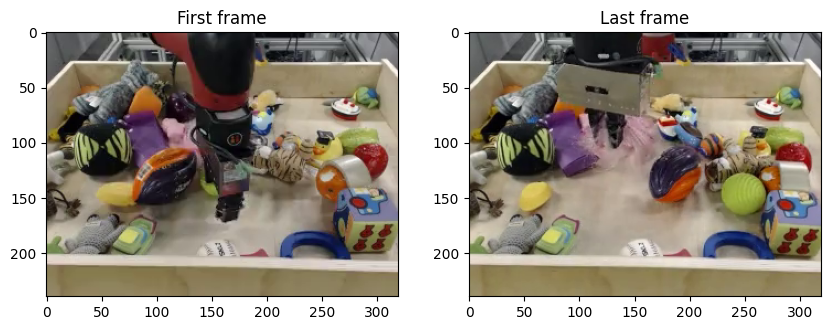

In [10]:
import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt
import io

sample_file = os.path.join(DATA_RAW, files[0])

with h5py.File(sample_file, 'r') as f:
    # Try cam0 (front view usually)
    video_bytes = f['env/cam0_video/frames'][()].tobytes()
    
    # Decode mp4 bytes into frames
    frames = iio.imread(io.BytesIO(video_bytes), extension=".mp4")
    
    print("Decoded frames shape:", frames.shape)  # expected (T, H, W, 3)
    
    # Show first and last frame
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(frames[0])
    axes[0].set_title("First frame")
    axes[1].imshow(frames[-1])
    axes[1].set_title("Last frame")
    plt.show()

In [7]:
with h5py.File(sample_file, 'r') as f:
    actions = f['policy/actions'][:]
    states = f['env/state'][:]
    
    print("Actions shape:", actions.shape)
    print("Actions min/max:\n", actions.min(axis=0), actions.max(axis=0))
    
    print("\nStates shape:", states.shape)
    print("States min/max:\n", states.min(axis=0), states.max(axis=0))

Actions shape: (30, 4)
Actions min/max:
 [-0.07       -0.07       -0.13489122 -0.38543621] [0.06870245 0.06072028 0.15629187 0.16753556]

States shape: (31, 5)
States min/max:
 [ 0.39318238  0.2977801   0.03321957  1.57439953 -0.99999051] [0.93972369 0.60413604 1.07196699 3.0871584  1.00576578]


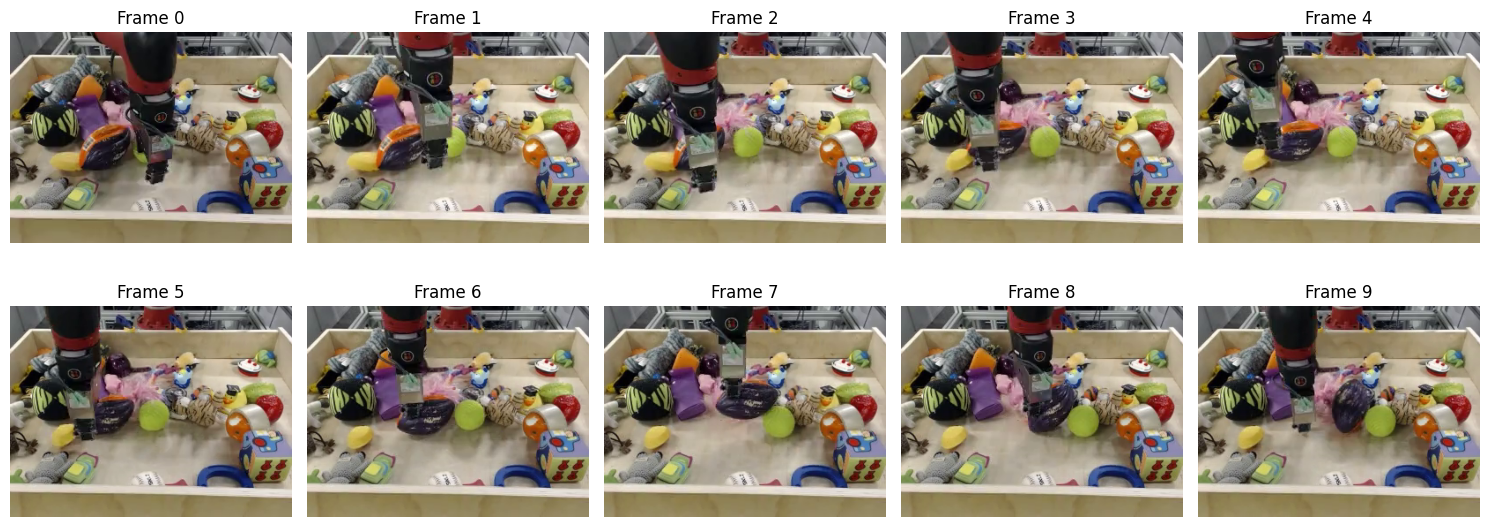

In [11]:
# Show first 10 frames in a grid
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(frames):
        ax.imshow(frames[i])
        ax.set_title(f"Frame {i}")
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

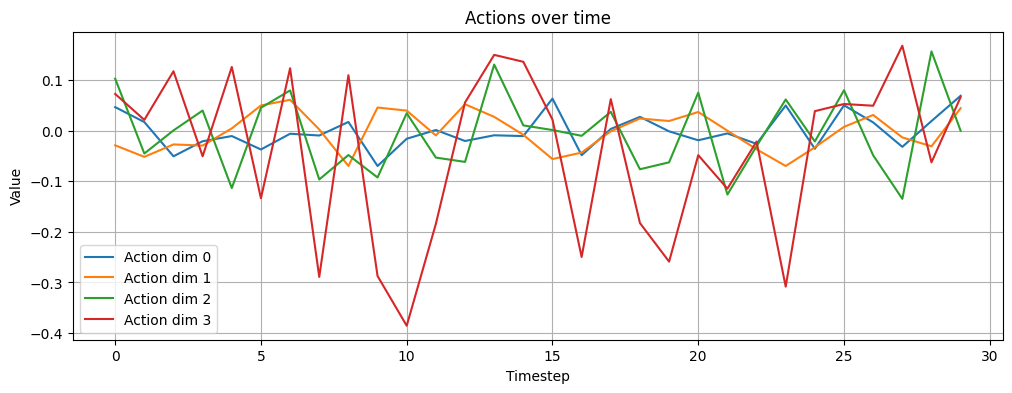

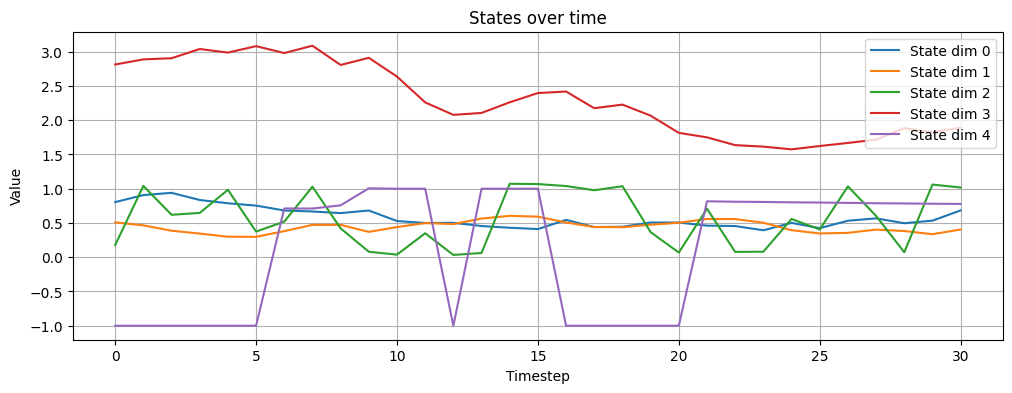

In [12]:
import matplotlib.pyplot as plt

# Actions plot
plt.figure(figsize=(12, 4))
for dim in range(actions.shape[1]):
    plt.plot(actions[:, dim], label=f"Action dim {dim}")
plt.title("Actions over time")
plt.xlabel("Timestep")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# States plot
plt.figure(figsize=(12, 4))
for dim in range(states.shape[1]):
    plt.plot(states[:, dim], label=f"State dim {dim}")
plt.title("States over time")
plt.xlabel("Timestep")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
import imageio

# Save first 31 frames as mp4 (slow playback for inspection)
writer = imageio.get_writer('sample_trajectory_preview.mp4', fps=5)
for frame in frames:
    writer.append_data(frame)
writer.close()

print("Preview video saved: sample_trajectory_preview.mp4")

Preview video saved: sample_trajectory_preview.mp4


## Helper Function: Load One Trajectory
Extract RGB frames (cam0), actions, and states from an HDF5 file.

Successfully decoded 31 frames from cam0
Loaded frames shape: (31, 240, 320, 3)
Actions shape: (30, 4)
States shape: (31, 5)


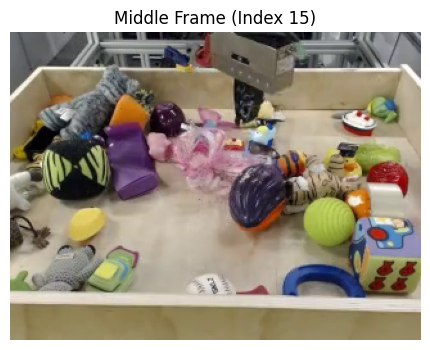

In [18]:
import h5py
import imageio.v3 as iio
from io import BytesIO
import numpy as np
import os
import matplotlib.pyplot as plt

def load_trajectory(file_path, camera_idx=0):
    """
    Load one trajectory: RGB frames from specified camera, actions, states.
    """
    with h5py.File(file_path, 'r') as f:
        # Camera group
        cam_key = f'env/cam{camera_idx}_video/frames'
        if cam_key not in f:
            raise ValueError(f"Camera {camera_idx} not found in {file_path}")
        
        # 1. Read raw data and FORCE convert to standard Python bytes
        video_data = f[cam_key][()].tobytes()
        
        # 2. Decode using BytesIO with an extension hint
        # We use extension=".mp4" so imageio knows which codec to look for
        try:
            frames = iio.imread(BytesIO(video_data), extension=".mp4")
        except Exception as e:
            print(f"Primary decoding failed: {e}")
            # Fallback: Explicitly try the pyav plugin if installed
            frames = iio.imread(BytesIO(video_data), plugin="pyav", extension=".mp4")
        
        frames = np.asarray(frames).astype(np.uint8)
        
        # Actions (T-1)
        actions = f['policy/actions'][:].astype(np.float32)
        
        # States (T)
        states = f['env/state'][:].astype(np.float32)
        
    print(f"Successfully decoded {frames.shape[0]} frames from cam{camera_idx}")
    return frames, actions, states

# --- Execution ---
# Ensure DATA_RAW and files are defined in your notebook
sample_file = os.path.join(DATA_RAW, files[0])
try:
    frames, actions, states = load_trajectory(sample_file, camera_idx=0)

    print("Loaded frames shape:", frames.shape)
    print("Actions shape:", actions.shape)
    print("States shape:", states.shape)

    plt.figure(figsize=(6, 4))
    plt.imshow(frames[len(frames)//2])
    plt.title(f"Middle Frame (Index {len(frames)//2})")
    plt.axis('off')
    plt.show()
except Exception as e:
    print(f"Failed to load trajectory: {e}")

In [21]:
import h5py
import imageio.v3 as iio
from io import BytesIO
import numpy as np
import torch
import os

def load_trajectory(file_path, camera_idx=0, target_size=None):
    """
    Load one trajectory: RGB frames (camX), actions, states.
    """
    with h5py.File(file_path, 'r') as f:
        cam_key = f'env/cam{camera_idx}_video/frames'
        if cam_key not in f:
            raise ValueError(f"Camera {camera_idx} not found in {file_path}")

        # 1. Read raw MP4 bytes and force conversion to standard Python bytes
        video_data = f[cam_key][()].tobytes()

        # 2. Decode video from bytes with an extension hint
        try:
            # We use extension=".mp4" to tell imageio this is a video stream
            # plugin="pyav" is generally more robust for in-memory buffers
            frames_np = iio.imread(BytesIO(video_data), extension=".mp4", plugin="pyav")
        except Exception as e:
            # Fallback to general imread which will try to guess the plugin
            try:
                frames_np = iio.imread(BytesIO(video_data), extension=".mp4")
            except Exception as e2:
                raise RuntimeError(f"Video decoding failed after multiple attempts.\n"
                                   f"Make sure 'pip install av' or 'pip install imageio-ffmpeg' is run.\n"
                                   f"Error: {e2}")

        # 3. Convert to torch (T, H, W, C) → (T, C, H, W) and scale to [0,1]
        frames = torch.from_numpy(frames_np).permute(0, 3, 1, 2).float() / 255.0

        # Optional resize
        if target_size is not None:
            # interpolate expects (Batch, Channel, H, W)
            frames = torch.nn.functional.interpolate(
                frames, size=target_size, mode='bilinear', align_corners=False
            )

        # Actions & states
        actions = torch.from_numpy(f['policy/actions'][:]).float()
        states = torch.from_numpy(f['env/state'][:]).float()

    print(f"Loaded {frames.shape[0]} frames from {cam_key}")
    return frames, actions, states

# --- Test ---
# Ensure pip install av has been run in your terminal!
sample_file = os.path.join(DATA_RAW, files[0])
frames, actions, states = load_trajectory(sample_file, camera_idx=0, target_size=(128, 128))

Loaded 31 frames from env/cam0_video/frames


Successfully loaded: berkeley_sawyer_traj11308.hdf5
Frames shape:  torch.Size([31, 3, 128, 128])
Actions shape: torch.Size([30, 4])
States shape:  torch.Size([31, 5])


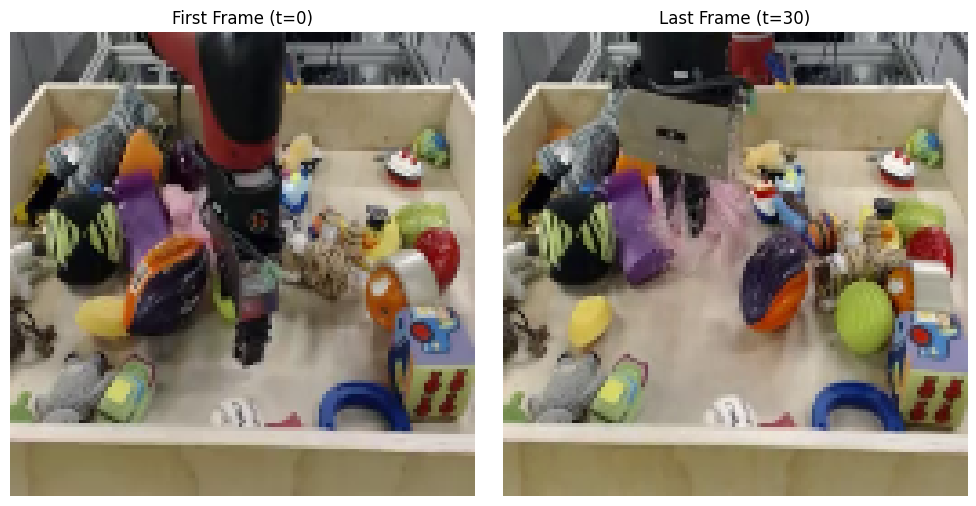

In [24]:
import os
import h5py
import torch
import numpy as np
import imageio.v3 as iio
from io import BytesIO
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

class RoboNetDataset(Dataset):
    def __init__(self, file_list, data_root, camera_idx=0, resize_to=(128, 128)):
        """
        Args:
            file_list: List of .hdf5 filenames.
            data_root: Directory where HDF5 files are stored.
            camera_idx: Which camera to use (0-4).
            resize_to: Tuple (H, W) for resizing frames.
        """
        self.file_list = file_list
        self.data_root = data_root
        self.camera_idx = camera_idx
        self.resize_to = resize_to

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        file_path = os.path.join(self.data_root, self.file_list[idx])

        with h5py.File(file_path, 'r') as f:
            # 1. Access Camera Video
            cam_key = f'env/cam{self.camera_idx}_video/frames'
            if cam_key not in f:
                raise ValueError(f"Camera {self.camera_idx} not found in {file_path}")

            # 2. Extract raw bytes and force conversion to standard Python bytes
            video_data = f[cam_key][()].tobytes()

            # 3. Decode MP4 using BytesIO + Extension Hint
            try:
                # pyav is the preferred plugin for imageio v3 video decoding
                frames_np = iio.imread(BytesIO(video_data), extension=".mp4", plugin="pyav")
            except Exception:
                # Fallback to general imread if pyav is not installed
                frames_np = iio.imread(BytesIO(video_data), extension=".mp4")

            # 4. Extract Actions and States
            # Actions (T-1, 4), States (T, 5)
            actions = torch.from_numpy(f['policy/actions'][:]).float()
            states = torch.from_numpy(f['env/state'][:]).float()

        # 5. Process Frames: (T, H, W, C) -> (T, C, H, W) and scale to [0, 1]
        frames = torch.from_numpy(frames_np).permute(0, 3, 1, 2).float() / 255.0

        # 6. Batch Resize (More efficient than loop)
        if self.resize_to:
            frames = torch.nn.functional.interpolate(
                frames, size=self.resize_to, mode='bilinear', align_corners=False
            )

        return {
            'frames': frames,   # shape: (T, 3, H, W)
            'actions': actions, # shape: (T-1, 4)
            'states': states,   # shape: (T, 5)
            'filename': self.file_list[idx]
        }

# --- Configuration & Testing ---

# Assuming DATA_RAW and files (list of .hdf5) are already defined in your notebook
# If not, uncomment and update these:
# DATA_RAW = r"E:\NVIDIA_PROJECTS\Neural-World-Model-for-Embodied-AI-Robotics\data\raw\robonet\hdf5"
# files = [f for f in os.listdir(DATA_RAW) if f.endswith('.hdf5')]

# 1. Initialize Dataset
dataset = RoboNetDataset(files, DATA_RAW, camera_idx=0, resize_to=(128, 128))

# 2. Test a single sample
try:
    sample = dataset[0]
    print(f"Successfully loaded: {sample['filename']}")
    print(f"Frames shape:  {sample['frames'].shape}")   # (31, 3, 128, 128)
    print(f"Actions shape: {sample['actions'].shape}")  # (30, 4)
    print(f"States shape:  {sample['states'].shape}")   # (31, 5)

    # 3. Visualization
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    # First frame
    first_frame = sample['frames'][0].permute(1, 2, 0).numpy()
    axes[0].imshow(first_frame)
    axes[0].set_title("First Frame (t=0)")
    axes[0].axis('off')
    
    # Last frame
    last_frame = sample['frames'][-1].permute(1, 2, 0).numpy()
    axes[1].imshow(last_frame)
    axes[1].set_title(f"Last Frame (t={len(sample['frames'])-1})")
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error during dataset test: {e}")

# 4. Optional: Create DataLoader
# dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

Batch keys: ['frames', 'actions', 'states', 'filename']
Batch frames shape: torch.Size([2, 31, 3, 128, 128])
Batch actions shape: torch.Size([2, 30, 4])
Batch states shape: torch.Size([2, 31, 5])
Batch memory usage (approx): 11.625 MB


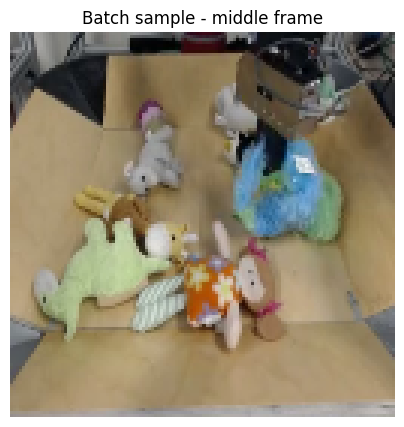

In [25]:
from torch.utils.data import DataLoader

# Create dataset with first 8 files (small for testing)
small_dataset = RoboNetDataset(files[:8], DATA_RAW, camera_idx=0, resize_to=(128, 128))

# Create DataLoader
dataloader = DataLoader(
    small_dataset,
    batch_size=2,           # small batch to test memory
    shuffle=True,
    num_workers=0,          # start with 0; increase later
    pin_memory=True         # good for GPU
)

# Get one batch
batch = next(iter(dataloader))

print("Batch keys:", list(batch.keys()))
print("Batch frames shape:", batch['frames'].shape)      # expected: [2, 31, 3, 128, 128]
print("Batch actions shape:", batch['actions'].shape)    # [2, 30, 4]
print("Batch states shape:", batch['states'].shape)      # [2, 31, 5]
print("Batch memory usage (approx):", batch['frames'].element_size() * batch['frames'].nelement() / 1024**2, "MB")

# Show first frame of first item in batch
plt.figure(figsize=(5, 5))
plt.imshow(batch['frames'][0, 15].permute(1, 2, 0).numpy())  # middle frame of first sample
plt.title("Batch sample - middle frame")
plt.axis('off')
plt.show()

In [26]:
# ────────────────────────────────────────────────
#           Train / Val / Test Split
# ────────────────────────────────────────────────

import random

# Set seed for reproducibility (same split every time you run)
random.seed(42)

# Make a copy of the full file list and shuffle it
all_files = files.copy()           # files is your list from earlier (700 files)
random.shuffle(all_files)

# Calculate split indices (80% train, 10% val, 10% test)
total = len(all_files)
train_end = int(0.8 * total)
val_end = int(0.9 * total)

train_files = all_files[:train_end]
val_files   = all_files[train_end:val_end]
test_files  = all_files[val_end:]

# Print results
print(f"Total files: {total}")
print(f"Train files: {len(train_files)} ({len(train_files)/total*100:.1f}%)")
print(f"Val files:   {len(val_files)}   ({len(val_files)/total*100:.1f}%)")
print(f"Test files:  {len(test_files)}  ({len(test_files)/total*100:.1f}%)")

# Optional: show first few files from each split
print("\nFirst 3 train files:", train_files[:3])
print("First 3 val files:  ", val_files[:3])
print("First 3 test files: ", test_files[:3])

Total files: 700
Train files: 560 (80.0%)
Val files:   70   (10.0%)
Test files:  70  (10.0%)

First 3 train files: ['penn_kuka_traj1160.hdf5', 'stanford_fetch_traj1223.hdf5', 'google_traj29419.hdf5']
First 3 val files:   ['stanford_fetch_traj1500.hdf5', 'stanford_fetch_traj707.hdf5', 'berkeley_sawyer_traj15183.hdf5']
First 3 test files:  ['berkeley_widowx_traj3748.hdf5', 'penn_baxter_right_traj3618.hdf5', 'penn_kuka_traj413.hdf5']


In [27]:
# Test loading one train sample
train_dataset = RoboNetDataset(train_files, DATA_RAW, camera_idx=0, resize_to=(128, 128))
sample = train_dataset[0]

print("Loaded from train split:", sample['filename'])
print("Frames shape:", sample['frames'].shape)

Loaded from train split: penn_kuka_traj1160.hdf5
Frames shape: torch.Size([31, 3, 128, 128])


In [42]:
import os
import sys

# 1. Get the directory of the current notebook (...\notebooks)
notebook_dir = os.getcwd()

# 2. Define the project root as one level up
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))

# 3. Add it to the path so "from models..." works
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print(f"✅ project_root defined as: {project_root}")

✅ project_root defined as: e:\NVIDIA_PROJECTS\Neural-World-Model-for-Embodied-AI-Robotics


In [43]:
from models.data_loader import RoboNetDataset

# Define the absolute path to your HDF5 files using the now-defined project_root
DATA_RAW = os.path.join(project_root, "data", "raw", "robonet", "hdf5")

# Get list of filenames (not full paths, to avoid the "double path" error)
files = [f for f in os.listdir(DATA_RAW) if f.endswith('.hdf5')]

# Test the dataset
dataset = RoboNetDataset(files, DATA_RAW, camera_idx=0, resize_to=(128, 128))
sample = dataset[0]

print("🚀 Data loaded successfully!")
print("Frames shape:", sample['frames'].shape)

🚀 Data loaded successfully!
Frames shape: torch.Size([31, 3, 128, 128])


In [44]:
import json

# Save the splits you already have
splits = {
    "train": train_files,
    "val": val_files,
    "test": test_files
}

split_path = os.path.join(PROJECT_ROOT, "data", "splits.json")
os.makedirs(os.path.dirname(split_path), exist_ok=True)

with open(split_path, "w") as f:
    json.dump(splits, f, indent=2)

print(f"Splits saved to: {split_path}")
print(f"Train: {len(train_files)}, Val: {len(val_files)}, Test: {len(test_files)}")

Splits saved to: E:\NVIDIA_PROJECTS\Neural-World-Model-for-Embodied-AI-Robotics\data\splits.json
Train: 560, Val: 70, Test: 70


In [48]:
with open("../data/splits.json") as f:
    splits = json.load(f)
train_files = splits["train"]

print(train_files)

['penn_kuka_traj1160.hdf5', 'stanford_fetch_traj1223.hdf5', 'google_traj29419.hdf5', 'berkeley_widowx_traj4605.hdf5', 'stanford_franka_traj1271.hdf5', 'penn_baxter_left_traj8399.hdf5', 'penn_baxter_left_traj652.hdf5', 'stanford_franka_corr_noise_traj2646.hdf5', 'penn_kuka_traj238.hdf5', 'berkeley_sawyer_traj53711.hdf5', 'stanford_fetch_traj3793.hdf5', 'berkeley_widowx_traj1631.hdf5', 'penn_baxter_right_traj5460.hdf5', 'berkeley_widowx_traj4049.hdf5', 'berkeley_widowx_traj4167.hdf5', 'berkeley_sawyer_traj16632.hdf5', 'stanford_franka_corr_noise_traj3033.hdf5', 'berkeley_sawyer_traj30324.hdf5', 'stanford_fetch_traj1625.hdf5', 'berkeley_sawyer_traj14198.hdf5', 'berkeley_widowx_traj430.hdf5', 'google_traj10249.hdf5', 'berkeley_widowx_traj3014.hdf5', 'stanford_franka_traj4800.hdf5', 'google_traj45786.hdf5', 'google_traj350.hdf5', 'stanford_fetch_traj1973.hdf5', 'penn_baxter_left_traj2841.hdf5', 'penn_kuka_traj449.hdf5', 'berkeley_sawyer_traj38431.hdf5', 'penn_kuka_traj1243.hdf5', 'penn_baxt

In [49]:
import json

# Assuming you already have train_files, val_files, test_files from earlier
# (if not, re-run your split cell first)

print(f"Train: {len(train_files)}, Val: {len(val_files)}, Test: {len(test_files)}")

# Save splits
splits = {
    "train": train_files,
    "val": val_files,
    "test": test_files
}

split_path = os.path.join(PROJECT_ROOT, "data", "splits.json")
os.makedirs(os.path.dirname(split_path), exist_ok=True)

with open(split_path, "w") as f:
    json.dump(splits, f, indent=2)

print(f"Splits saved successfully to: {split_path}")

# Quick load test
with open(split_path) as f:
    loaded = json.load(f)
print(f"Loaded train files count: {len(loaded['train'])}")

Train: 560, Val: 70, Test: 70
Splits saved successfully to: E:\NVIDIA_PROJECTS\Neural-World-Model-for-Embodied-AI-Robotics\data\splits.json
Loaded train files count: 560


Augmented frames shape: torch.Size([31, 3, 128, 128])


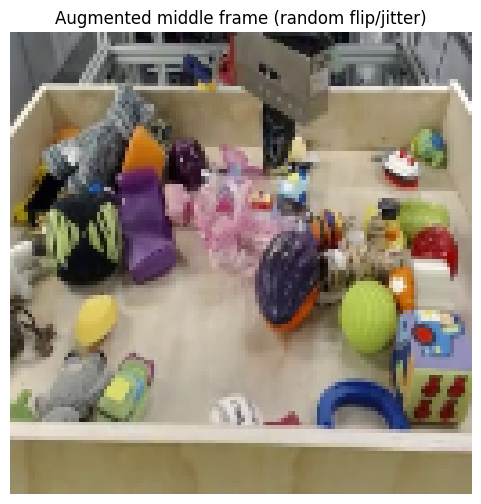

In [50]:
from models.data_loader import RoboNetDataset

# Load one sample with augmentation
dataset = RoboNetDataset(files[:1], DATA_RAW)
sample = dataset[0]

print("Augmented frames shape:", sample['frames'].shape)

# Visualize middle frame (should look slightly different each run)
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.imshow(sample['frames'][15].permute(1, 2, 0).numpy())
plt.title("Augmented middle frame (random flip/jitter)")
plt.axis('off')
plt.show()